Accuracy_NB: [0.3530811269198153, 0.39201922170922454, 0.35529539244323, 0.24161405823047205, 0.6160604918496184, 0.24290963912183172, 0.5772166211250354, 0.6534203335531895, 0.6601337981720531, 0.6004664091208894, 0.6270140393856591, 0.6575661924055404, 0.2395882408367097, 0.6487562423442947, 0.6331150475831527, 0.3360972392349006, 0.34702723075473474, 0.3845755205879582, 0.6164609441251295, 0.6614529350796193, 0.6517714124187317, 0.6327617073400547, 0.6163431640440968, 0.3780269480825403, 0.37296240459813434, 0.5584189201922171, 0.6079101102421558, 0.3947752756053896, 0.34427117685856967, 0.5733769904833694, 0.3507255252991614, 0.40009893526806745, 0.3747291058136248, 0.36000659568453786, 0.6050598322811646, 0.24389899180250635, 0.38895693960237443, 0.5970978988033544, 0.6188872137944031, 0.6440921511354, 0.6087581268255913, 0.6531141053425045, 0.3642466786017149, 0.6057429567511542, 0.3758126825591256, 0.5338735513050032, 0.3777207198718553, 0.38539998115518703, 0.6443041552812588, 

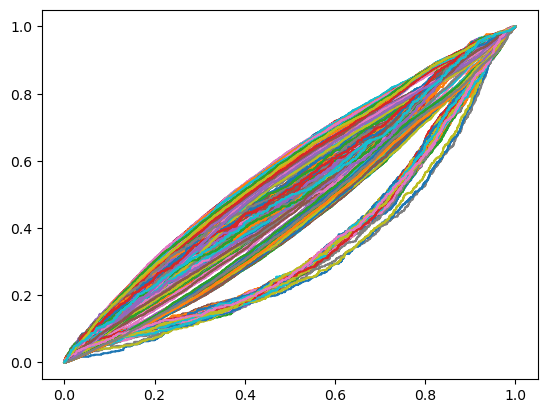

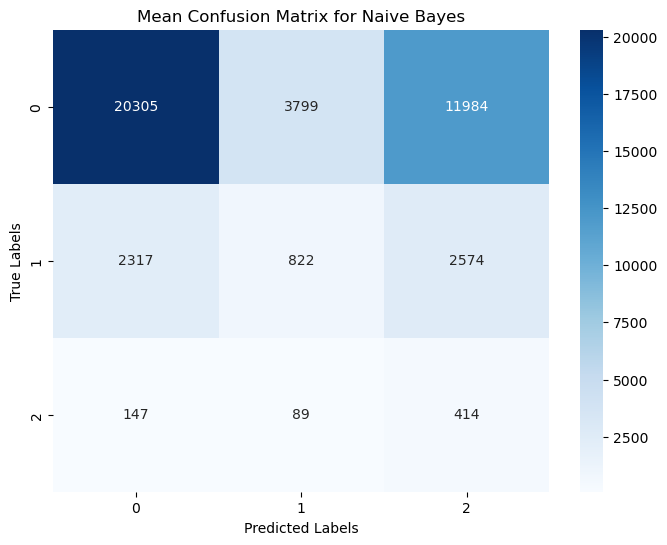

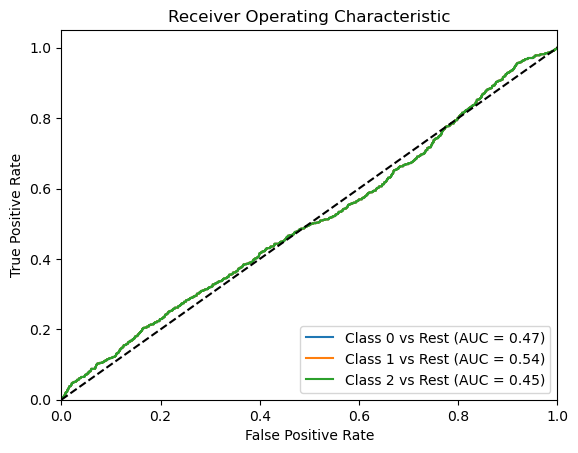

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
dataset = pd.read_csv("/Users/wegdan/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity']  # Replace 'target_variable' with the name of your target column

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define the number of bootstrap iterations
n_iterations = 100

# Step 6: Perform bootstrap resampling and evaluate model performance
accuracy_scores = []
train_accuracy_scores = []
confusion_matrices = []
roc_auc_scores = []

for _ in range(n_iterations):
    # Create a bootstrap sample
    X_boot, y_boot = resample(X_train_scaled, y_train)
    
    # Fit the Naive Bayes model
    model = GaussianNB(var_smoothing=1e-6)
    model.fit(X_boot, y_boot)
    
    # Calculate training accuracy
    y_train_pred = model.predict(X_boot)
    train_accuracy = accuracy_score(y_boot, y_train_pred)
    train_accuracy_scores.append(train_accuracy)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Calculate confusion matrix
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    
    # Calculate ROC curve and AUC for each class
    classes = np.unique(y_test)
    roc_auc_scores_class = []
    
    for class_ in classes:
        y_test_binary = np.where(y_test == class_, 1, 0)
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        roc_auc_scores_class.append(roc_auc)
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'Class {class_} vs Rest (AUC = {roc_auc:.2f})')
    
    roc_auc_scores.append(roc_auc_scores_class)

# Step 7: Calculate the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Step 8: Calculate the mean and standard deviation of training accuracy scores
mean_train_accuracy = np.mean(train_accuracy_scores)
std_train_accuracy = np.std(train_accuracy_scores)

# Step 9: Print the mean and standard deviation of accuracy scores
print("Accuracy_NB:", accuracy_scores)
print("Mean Accuracy_NB:", mean_accuracy)
print("Standard Deviation of Accuracy_NB:", std_accuracy)

# Step 10: Print the mean and standard deviation of training accuracy scores
print("Training Accuracy_NB:", train_accuracy_scores)
print("Mean Training Accuracy_NB:", mean_train_accuracy)
print("Standard Deviation of Training Accuracy_NB:", std_train_accuracy)

# Step 11: Calculate the mean confusion matrix
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Step 12: Plot the mean confusion matrix as a figure
plt.figure(figsize=(8, 6))
sns.heatmap(mean_confusion_matrix, annot=True, cmap='Blues', fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Mean Confusion Matrix for Naive Bayes')
plt.show()

# Step 13: Calculate the mean ROC curve and AUC for each class
roc_auc_scores_mean = np.mean(roc_auc_scores, axis=0)

# Step 14: Plot the mean ROC curves for each class
plt.figure()
for class_, roc_auc in zip(classes, roc_auc_scores_mean):
    plt.plot(fpr, tpr, label=f'Class {class_} vs Rest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random classifier curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy_logistic_regression: [0.8497832846508998, 0.8499246207481391, 0.8497832846508998, 0.8497832846508998, 0.8497597286346933, 0.8499481767643456, 0.8499246207481391, 0.8497832846508998, 0.8499246207481391, 0.8497597286346933, 0.8497361726184868, 0.8498068406671064, 0.849877508715726, 0.8499246207481391, 0.8498539526995195, 0.8497832846508998, 0.8499010647319325, 0.8499010647319325, 0.8498539526995195, 0.8497832846508998, 0.8499481767643456, 0.849830396683313, 0.8499481767643456, 0.8499246207481391, 0.8498068406671064, 0.8496655045698671, 0.8497597286346933, 0.8496655045698671, 0.8499010647319325, 0.8498068406671064, 0.849877508715726, 0.8499717327805522, 0.8497832846508998, 0.8497832846508998, 0.8498068406671064, 0.8498539526995195, 0.8498068406671064, 0.8497832846508998, 0.8499952887967587, 0.8499010647319325, 0.8496890605860736, 0.8498068406671064, 0.849877508715726, 0.849830396683313, 0.8498539526995195, 0.849830396683313, 0.8499717327805522, 0.8498539526995195, 0.8500424008291

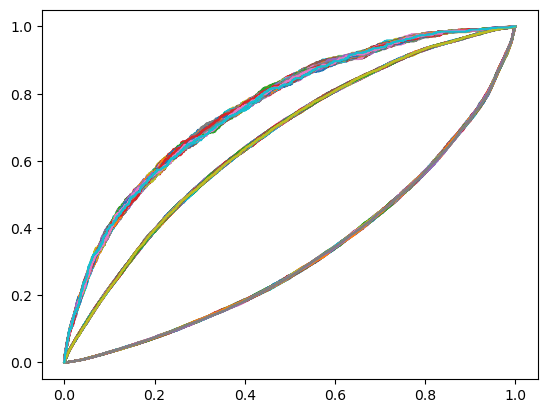

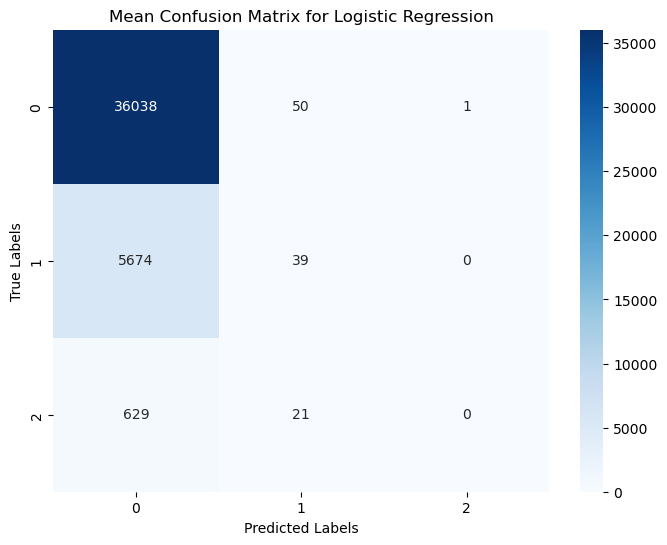

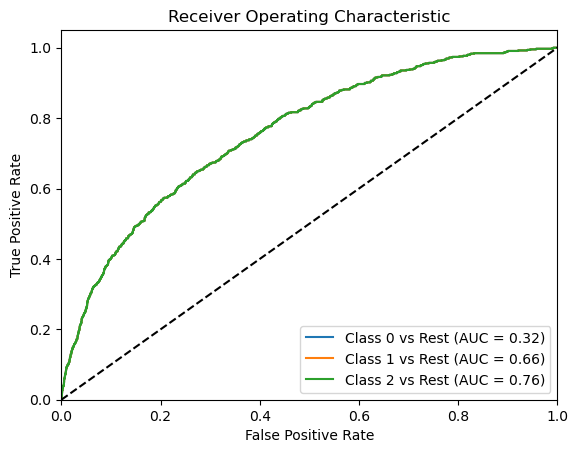

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
dataset = pd.read_csv("/Users/wegdan/Desktop/Team6.csv", low_memory=False)

# Step 2: Prepare the data
X = dataset.loc[:, ['longitude', 'latitude', 'police_force', 'number_of_vehicles', 'number_of_casualties', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 'speed_limit', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'hour', 'second_road', 'week_number', 'first_road_class_A(M)', 'first_road_class_B', 'first_road_class_C', 'first_road_class_Motorway', 'first_road_class_Unclassified', 'road_type_One way street/Slip road', 'road_type_Roundabout', 'road_type_Single carriageway', 'junction_detail_Mini-roundabout', 'junction_detail_More than 4 arms (not roundabout)', 'junction_detail_Not at junction or within 20 metres', 'junction_detail_Other junction', 'junction_detail_Private drive or entrance', 'junction_detail_Roundabout', 'junction_detail_Slip road', 'junction_detail_T or staggered junction', 'junction_control_Auto traffic signal', 'junction_control_Give way or uncontrolled', 'junction_control_Stop sign', 'urban_or_rural_area_Unallocated', 'urban_or_rural_area_Urban', 'date_August', 'date_December', 'date_February', 'date_January', 'date_July', 'date_June', 'date_March', 'date_May', 'date_November', 'date_October', 'date_September', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'period_of_day_evening', 'period_of_day_morning', 'period_of_day_night', 'moist', 'high_wind']]
y = dataset['accident_severity'] 

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define the number of bootstrap iterations
n_iterations = 100

# Step 6: Perform bootstrap resampling and evaluate model performance
accuracy_scores = []
confusion_matrices = []
roc_auc_scores = []
train_accuracy_scores = []  # List to store training accuracy

for _ in range(n_iterations):
    # Create a bootstrap sample
    X_boot, y_boot = resample(X_train_scaled, y_train)
    
    # Fit the logistic regression model
    model = LogisticRegression(max_iter=10000, solver='liblinear', penalty='l2', C=10)
    model.fit(X_boot, y_boot)
    
    # Calculate training accuracy
    y_train_pred = model.predict(X_boot)
    train_accuracy = accuracy_score(y_boot, y_train_pred)
    train_accuracy_scores.append(train_accuracy)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Calculate confusion matrix
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    
    # Calculate ROC curve and AUC for each class
    classes = np.unique(y_test)
    roc_auc_scores_class = []
    
    for class_ in classes:
        y_test_binary = np.where(y_test == class_, 1, 0)
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        roc_auc_scores_class.append(roc_auc)
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'Class {class_} vs Rest (AUC = {roc_auc:.2f})')
    
    roc_auc_scores.append(roc_auc_scores_class)

# Step 7: Calculate the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Step 8: Calculate the mean and standard deviation of training accuracy scores
mean_train_accuracy = np.mean(train_accuracy_scores)
std_train_accuracy = np.std(train_accuracy_scores)

# Step 9: Print the mean and standard deviation of accuracy scores
print("Accuracy_logistic_regression:", accuracy_scores)
print("Mean Accuracy_logistic_regression:", mean_accuracy)
print("Standard Deviation of Accuracy_logistic_regression:", std_accuracy)

# Step 10: Print the mean and standard deviation of training accuracy scores
print("Train Accuracy_logistic_regression:", train_accuracy_scores)
print("Mean Train Accuracy_logistic_regression:", mean_train_accuracy)
print("Standard Deviation of Train Accuracy_logistic_regression:", std_train_accuracy)

# Step 11: Calculate the mean confusion matrix
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Step 12: Plot the mean confusion matrix as a figure
plt.figure(figsize=(8, 6))
sns.heatmap(mean_confusion_matrix, annot=True, cmap='Blues', fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Mean Confusion Matrix for Logistic Regression')
plt.show()

# Step 13: Calculate the mean ROC curve and AUC for each class
roc_auc_scores_mean = np.mean(roc_auc_scores, axis=0)

# Step 14: Plot the mean ROC curves for each class
plt.figure()
for class_, roc_auc in zip(classes, roc_auc_scores_mean):
    plt.plot(fpr, tpr, label=f'Class {class_} vs Rest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random classifier curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
